# Intermedio - Pruebas Estadísticas y Regresión

### Autor : Alexander García
----

# Resumen

Este tutorial de nivel intermedio para Ciencia de Datos (DS) y Aprendizaje Automático (ML), trabajaremos de principio a fin diferentes aspectos y técnicas en DS para Pruebas Estadísticas en Investigación y Análisis de Datos.

En este tutorial trabajaremos a través del proceso de análisis de datos para el [gene count TCGA Data Set]
**Utilizaremos algunos resultados del Cuaderno Tutorial para Principiantes.**

Este es el tutorial intermedio y nos centraremos específicamente en pruebas estadísticas y modelos de regresión en **python**. Seguiremos trabajando con las *bibliotecas de python* introducidas en el Tutorial para Principiantes e introduciremos algunas nuevas bibliotecas con propósitos especiales en estadística.

> Bibliotecas utilizadas en este tutorial
* Manipulación y Procesamiento de Datos
     - pandas]( https://pandas.pydata.org/)
     - [numpy]( https://numpy.org/)
* Visualización de datos
	- [Matplotlib](https://matplotlib.org/)
    - Seaborn](https://seaborn.pydata.org/)
    - Altair](https://altair-viz.github.io/)
* Estadística
    - SciPy](https://www.scipy.org/)
    - [Statsmodels](https://www.statsmodels.org/stable/index.html)

## Preguntas

En este Cuaderno, nos centramos en averiguar las diferencias estadísticamente significativas en los genes entre los grupos de cáncer. También nos preocupa determinar la potencia estadística de nuestro experimento dados los datos de genes inspirados en el conjunto de datos PANCAN.

# Índice

[1. Antecedentes estadísticos](#1.-Antecedentes estadísticos)
* [1.1 Comprobación de hipótesis](#1.1-Hypothesis-Testing)
    - 1.1.2 Pasos en la comprobación estadística](#1.1.2-Pasos en la comprobación estadística)
        - Paso 1: Hipótesis](#Paso-1:-Hipótesis)
        - Paso 2: Significación](#Paso-2:-Significación)
        - Paso 3: Estadística de prueba](#Paso-3:-Estadística de prueba)
    - 1.1.3 Valor P](#1.1.3-Valor P)
    - 1.1.4 Significación estadística](#1.1.4-Significación estadística)

* [1.2 Potencia estadística y cálculos del tamaño de la muestra](#1.1-Potencia estadística y cálculos del tamaño de la muestra)
    - 1.2.1 Cálculos de población de una muestra](#1.1.1-Cálculos de población de una muestra)
    - 1.2.2 Comparación de cálculos de dos muestras](#1.1.2-Comparación de cálculos de dos muestras)

[2. Configuración](#2.-Configuración)

* [2.1 Importación de librerías Python](#2.1-Importing-Python-Libraries)
     - 2.1.1 Importación](#2.1.1-Importación)
     - 2.1.2 Cargar datos TCGA](#2.1.2-Cargar datos TCGA)

[3. Prueba de hipótesis](#3.-Hypothesis-Testing)
* 3.1 Prueba T en una muestra](#3.1-T-test-on-One-Sample)


[4. Potencia y tamaño de la muestra](#4.-Potencia y tamaño de la muestra)
* [4.1 Potencia de una muestra](#4.1-Potencia de una muestra)
* [4.2 Potencia de dos muestras](#4.2-Potencia de dos muestras)

----


# 1. 1. Antecedentes estadísticos

## 1.1 Pruebas de hipótesis

Las pruebas de hipótesis se utilizan para responder a preguntas sobre una población. Dados los datos de abundancia de genes que hemos estado viendo, se podría hacer una pregunta como:

> ¿Difieren los niveles medios de recuento del 'gen X' entre las personas con 'cáncer Y' frente al 'cáncer Z'?

Sin más conocimientos, lo mejor que podría hacer es mirar los gráficos o las estadísticas resumidas de sus muestras. Sin embargo, las medias de las muestras no son suficientes: hay que basarse en las poblaciones subyacentes. ¿Cómo se puede saber algo de toda la población? Aquí es donde entran en juego las pruebas de hipótesis estadísticas.

### 1.1.1 ¿Qué hacen las pruebas?

Las pruebas de hipótesis básicas básicamente preguntan: ¿cuál es la probabilidad de que nuestra muestra proceda de una población con distribución A frente a distribución B?
Por ejemplo, ¿qué probabilidad hay de que nuestra muestra proceda de una distribución con un recuento medio = X para una expresión génica?
Las pruebas de hipótesis son un marco cuantitativo y estandarizado desde el que responder a preguntas como ésta. De lo contrario, nos quedaríamos mirando gráficos y especulando.

### 1.1.2 Pasos de las pruebas estadísticas

#### Paso 1: Hipótesis

Como hemos dicho antes, lo primero que se necesita para realizar una prueba estadística es una hipótesis; por supuesto, hay que saber qué se quiere averiguar. 

Siempre nos decidimos por una **hipótesis nula** $H_{0}$, que es el caso base. 
A continuación, elegimos una **hipótesis alternativa** $H_{1}$, que contradice $H_{0}$.

En nuestro escenario imaginado anteriormente, nuestras hipótesis serían:

> El recuento medio es $X$; $H_{0}$: $\mu = X$ 
>
> El recuento medio no es $X$; $H_{1}$: $\mu \neq X$ 

**NOTA IMPORTANTE**
Utilizando la prueba de hipótesis, sólo hay dos formas de interpretar el resultado: se rechaza la hipótesis nula o no se rechaza. No se puede demostrar que la hipótesis nula sea cierta.

#### Paso 2: Importancia

Basándonos en la nota anterior, hay esencialmente cuatro resultados posibles y dos formas en las que el resultado de nuestra prueba de hipótesis podría resultar erróneo:

True Statement | Reject $H_{0}$ | Do Not Reject $H_{0}$
--------------|-------------|--------------------
$H_{0}$ is True | ***Type I Error*** | *Correct Decision*
$H_{0}$ is False | *Correct Decision* | ***Type II Error***

> **Error Tipo I:** Rechazando el Nulo cuando en realidad es verdadero.
>
> **Error Tipo II:** 'Aceptar' el Nulo cuando en realidad es falso

La probabilidad de tener un error de tipo I se denomina **nivel de significación** de una prueba de hipótesis.
Nivel de significación: $\alpha

La probabilidad de tener un error de tipo II se denomina $\beta$.

El **nivel de potencia** de una prueba es 1 - $\beta$. En otras palabras, la probabilidad de _"aceptar"_ la Nula cuando es realmente cierta. 
En definitiva, queremos realizar una prueba que __minimice $\alpha$ y maximice la potencia.__ El problema es que *$\alpha$ y $\beta$ están inversamente relacionados*. 

En el diseño de nuestro experimento, la forma de evitar esto es especificar el $\alpha$ de antemano, y luego tratar de maximizar la potencia.
Un valor comúnmente utilizado es $\alpha = 0,05$, pero dependiendo del campo otros valores como 0,025 o 0,01 son a menudo
suelen utilizarse. A continuación, tratamos de alcanzar un valor alto para la potencia, por ejemplo, 0,8 o 0,9, o superior, dependiendo del contexto. Para conseguir una potencia elevada suele ser necesario seleccionar un tamaño de muestra suficientemente grande.

#### Paso 3: Estadística de prueba
Una estadística de prueba es un valor estandarizado que se calcula en lugar de utilizar sólo la media de la muestra. Esto estandariza el proceso de prueba y es matemáticamente más conveniente.
Uno de estos "estadísticos de prueba" es el valor **t**:

$$
t = \frac{\overline{x} - m_{0}}{s * \sqrt{n}}
$$
>$\overline X$ - sample mean  
$\mu_0$ - population mean (Null Hypothesis)  
$\sigma$ - standard deviation  
$n$ - sample size 

T sigue algo llamado distribución t. En función del $\alfa$ decidido para la prueba, y del tamaño de la muestra, la distribución t se utiliza para calcular un **valor crítico**, con el que se compara t.

Esta comparación determina el resultado de una prueba.

Por ejemplo, si $alfa = 0,05$ y **t > valor crítico**, rechazaríamos $H_{0}$ con una significación de 0,05.

#### [Opcional]Paso 4: Intervalos de confianza
El intervalo de confianza es un intervalo calculado a partir de los datos utilizando una regla que garantiza que el intervalo tiene una cierta probabilidad especificada previamente (a menudo 95%, _1-$\alpha$_ ) de contener el valor verdadero del parámetro objetivo.

La fórmula para calcular el _Intervalo de confianza_ es entonces:

$$
C.I. = \overline X - (Critical \ Value) * (\frac{\sigma}{\sqrt{n}})
$$
> $\overline X$ - sample mean  
$Critical \ Value$ - either Z or t statistic at the desired $\alpha$  
$\sigma$ - standard deviation  
$n$ - sample size


### 1.1.3 Valor P
El **valor p** es otra forma de decidir sobre la importancia global del resultado de su prueba. Representa la probabilidad de obtener un resultado más extremo que el obtenido dada la hipótesis nula. Intuitivamente, si **p** es pequeño, indica que los resultados de nuestra prueba son estadísticamente significativos.
Un valor comúnmente utilizado es 0,05. Si p < 0,05 se puede decir que el resultado de la prueba es estadísticamente significativo.

### 1.1.4 Significación estadística
Teniendo en cuenta lo anterior, hay 2 formas de determinar la significación estadística de una prueba:

1. Calcular el estadístico de la prueba (t), compararlo con el valor crítico dado un nivel de significación ($\alpha = 0,05$). En el caso de $H_{0}: media = 0$ y $H_{1}: media > 0$, si t > valor crítico, rechazamos $H_{0}$ y el resultado es *estadísticamente significativo*. En caso contrario, no rechazamos, y el resultado es *no estadísticamente significativo*.

2. Si p < 0,05, rechazamos $H_{0}$ y el resultado es *estadísticamente significativo*. De lo contrario, no rechazamos, y el resultado es *no estadísticamente significativo*.

Estos métodos son completamente equivalentes. Como se verá más adelante, los paquetes modernos de pruebas estadísticas ofrecen ambas versiones del resultado.

## 1.2 Potencia estadística y cálculos del tamaño de la muestra

En el diseño de nuestros experimentos, uno de los aspectos más importantes es la elección de un tamaño de muestra adecuado, demasiado pequeño no nos dará información útil, demasiado grande nos hará perder tiempo y recursos.

Para encontrar una respuesta a nuestras preguntas principales en este cuaderno, y en cualquier investigación en general, debemos decidir qué *hipótesis* alternativas concretas, o *$H_{1}$*, son importantes para poder detectarlas con una ***potencia*** elevada.

En estadística, nos referimos a la **potencia** de un experimento como el control sobre la tasa de error *tipo II*:

**Potencia = *P* (Rechazar *$H_{0}$* dado que la alternativa *$H_{1}$* se cumple)**.  
También se escribe como  
**Potencia = 1 - *P* (Error de tipo II) = 1 - $\beta$**

Los cálculos de potencia son un aspecto importante del diseño experimental, ya que pueden indicarnos si los resultados de nuestro estudio son estadísticamente significativos o incluso si los resultados de estudios anteriores son incorrectos.  

Podemos realizar los cálculos de varias formas:
* fórmulas
* simulaciones
* calculadoras en línea, como ésta (https://www.stat.ubc.ca/~rollin/stats/ssize/n2.html)
* software comercial

En este cuaderno trabajaremos tanto con simulaciones como con fórmulas. Estas fórmulas se basan en supuestos familiares como
- independencia en nuestros datos de muestra
- normalidad de los errores  
- varianza constante 

por lo que a menudo se consideran un cálculo aproximado inicial de la potencia.

Las fórmulas que utilizaremos se derivan de la fórmula general para el estadístico de prueba 

$$
Z=\frac{\overline X - \mu_{0}}{\frac{\sigma}{\sqrt[]{n}}} \\	
$$
>$\overline X$ - sample mean  
$\mu_0$ - population mean (Null Hypothesis)  
$\sigma$ - standard deviation  
$n$ - sample size  


Manipulamos algebraicamente la fórmula y permitimos que $Z$ dependa del nivel de significación deseado $\alpha$ para los valores cuantílicos en la Distribución Normal, $N(0,1)$. La potencia de la prueba para una media se _incrementa_ por:

1. Aumentando la diferencia entre las medias bajo las hipótesis
hipótesis nula y alternativa ($\mu_1 - \mu_0$).
2. Aumentando el nivel de significación ($\alpha$).
3. Disminuir la desviación típica ($\sigma$).
4. Aumentar el tamaño de la muestra ($n$).

### 1.2.1 Cálculos de población de una muestra

> $$
\hbox{Power} = P\left( N(0,1) <
	-Z_{1 - \alpha / 2} + \frac{ |\mu_1 - \mu_0|}{ \sigma / \sqrt n } \right) = 	\Phi(-Z_{1 - \alpha / 2} + \frac{ |\mu_1 - \mu_0|}{ \sigma / \sqrt n } ),
$$
donde $\Phi$ es la fdc de la distribución N(0,1).

El tamaño de la muestra que se requiere para tener una potencia igual a $1-\beta$:

> $$
	n = \frac{ \sigma^2 (Z_{1 - \beta} + Z_{1 - \alpha / 2})^2}{ (\mu_0 - \mu_1)^2 }.
$$

### 1.2.2 Comparación de cálculos de dos muestras

Al comparar 2 muestras, consideramos la prueba de $H_0:\mu_A=\mu_B$ frente a
$H_0:\mu_A\neq\mu_B$, donde $\mu_A$ y $\mu_B$ son
medias de dos poblaciones. Suponiendo una población conocida
varianza $\sigma^2$ y tamaños de muestra $n$ por grupo,
el estadístico de la prueba es

> $$
Z=\frac{|\bar X_A - \bar X_B|}{\sqrt{\sigma_A^2/n_A+\sigma_B^2/n_B} },
$$

As a result, our power and sample size formulas become
> $$
\hbox{Power} = \Phi ( -Z_{1 - \alpha / 2} + \frac{|\Delta|}{ \sqrt{\sigma_A^2/n_A+\sigma_B^2/n_B}} ),
$$  
$$
n = \frac{ (\sigma_A^2+\sigma_B^2) (Z_{1 - \beta} + Z_{1 - \alpha/2})^2}{ \Delta^2 }.
$$

Where $|\Delta|=|\mu_A - \mu_B|$.

# 2. Configuración

Pasaremos del conjunto de datos PANCAN a los datos de recuento de genes (conjuntos de datos disponibles  de los mismos cinco tipos de cáncer (BRCA, KIRC, COAD, LUAD, PRAD) de los proyectos TCGA disponibles en [National Cancer Institute's Genomic Data Commons](https://gdc.cancer.gov/). 

Utilizaremos los conjuntos de datos de genes y metadatos para nuestros experimentos estadísticos, ya que los metadatos proporcionan algunos subgrupos interesantes para los cánceres para los que podemos crear pruebas. También utilizaremos algunos datos genómicos de cáncer de COSMIC: [Catalog Of Somatic Mutations In Cancer](https://cancer.sanger.ac.uk/). Una advertencia acerca de este conjunto de datos de genes, aunque inspirado en el conjunto de datos PANCAN, es casi el doble de tamaño que el PANCAN y es probable que tengamos que lidiar con este uso de memoria.



## 2.1 Importando Bibliotecas Python

Utilizaremos todas las librerías del cuaderno tutorial anterior, pero además introduciremos tres librerías con fines estadísticos y de datos:
> SciPy  
statsmodels  
sklearn


### 2.1.1 Importaciones
Como siempre, primero importamos todos los paquetes que queremos usar antes de hacer nada más.

Nota:
Notarás un código extra en la celda de abajo además del que importa las librerías, esto es para algunos formatos para mostrar los resultados en este tutorial y no tienen ningún efecto extra en nuestro análisis estadístico (pueden ser omitidos).

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Estadisticos
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

# Visualización
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

# establecer el estilo del plot
plt.style.use('ggplot')
%matplotlib inline


In [2]:
%%HTML
<style>td {font-size: 15px}</style>

Ahora, para nuestras pruebas estadísticas vamos a aprovechar principalmente las funciones de las librerías *SciPy* y *statsmodels*, ya que estas tienen funciones preempaquetadas especializadas en estadística. Una cosa a tener en cuenta es que tenemos dos declaraciones de importación para la API *statsmodels*, el **statsmodels.api** importa las funciones que vamos a utilizar, el [**statsmodels.formula.api**](https://www.statsmodels.org/devel/example_formulas.html) nos permite trabajar con fórmulas _"estilo R"_ dentro de python.

### 2.1.2 Cargar Datos TCGA

Ok, como sabemos por el Tutorial anterior (tutorial I), tenemos un conjunto de datos muy grande y posiblemente podría conducir a un gran uso de memoria. Utilizaremos nuestro archivo *metadata.csv* para crear un subconjunto más pequeño que esperamos que contenga una representación del conjunto de datos más grande. Podríamos seguir adelante y subconjuntar el conjunto de datos de genes de la misma manera que hicimos en el Cuaderno de novatos, sin embargo tenemos la posibilidad de no obtener una muestra representativa del conjunto de datos. Lo bueno de nuestro gran conjunto de datos es que nos proporciona una pseudo forma de replicar cómo podríamos realizar un experimento estadístico real.

Vamos a seguir el mismo proceso que hicimos en el Cuaderno de Novatos por lo que sólo lo pondremos en una función de Python para que podamos reutilizarlo más tarde si es necesario.


In [4]:
def create_genes_subset(split_size=.1):
    """
        Crea un dataframe más pequeño a partir del archivo grande 'genes.csv' basándose en una división del archivo de metadatos.
        Devuelve un dataframe transformado por log2 y el índice necesario para que las muestras restantes
        del archivo genes.csv sigan siendo independientes.
    
    """
    
    metadata = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/ml_pancancer_python/metadata.csv')
    
    big_split, small_split = train_test_split(metadata, test_size=split_size, random_state=4)
    
    skiplines_small = np.sort(big_split.index) + 1 
    skiplines_big = np.sort(small_split.index) + 1
    
    genes_small = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/ml_pancancer_python/genes.csv', skiprows=skiplines_small)
    
    genes_nonAllZero = genes_small.loc[:,~genes_small.isin([0]).all(axis=0)]
    
    genes_log2_trans = np.log2(genes_nonAllZero.iloc[:,1:] + 1)
    genes_log2_trans['barcode'] = genes_small['barcode']
    
    genes_merged = pd.merge(left=small_split, right=genes_log2_trans, how='left', left_on='barcode', right_on='barcode')
    
    # Liberar memoria borrando dataframes
    del genes_small, genes_nonAllZero, genes_log2_trans, skiplines_small, skiplines_big
    
    return genes_merged, big_split, small_split

Tenemos la función para devolver el subconjunto más pequeño del más grande *genes.csv*. Esto es muy útil ya que podemos crear una pseudo versión de lo que sería haber diseñado un experimento. Dado que estamos tratando de calcular el tamaño de la muestra y la potencia, a menudo utilizamos un valor para la desviación estándar de un estudio anterior o un estudio realizado en una población diferente, pero comparable. De esta forma podemos aproximarnos a este tipo de escenario.

In [5]:
# cargamos los datos de la función, necesitamos configurar los nombres correctos de las variables ya que se devuelven 2 cosas
genes_small_log2, big_meta, small_meta = create_genes_subset()

# comprobamos el conjunto de datos
genes_small_log2.head(3)

,barcode,shortLetterCode,tumor_stage,age_at_diagnosis,year_of_diagnosis,alcohol_history,race,ethnicity,gender,vital_status,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-YL-A8HJ-01A-11R-A36G-07,TP,not reported,21416.0,2009.0,Not Reported,white,not hispanic or latino,male,Alive,...,0.0,9.514700,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190
1,TCGA-OL-A66K-01A-11R-A29R-07,TP,stage iia,26299.0,2010.0,Not Reported,white,not hispanic or latino,female,Dead,...,0.0,0.000000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256
2,TCGA-D8-A1X7-01A-11R-A14M-07,TP,stage iia,14858.0,2010.0,Not Reported,white,not hispanic or latino,female,Alive,...,0.0,7.371455,0.000000,16.080059,11.664703,0.000000,0.000000,11.083273,12.384756,10.953567


¡Bien! Ahora tenemos nuestros datos de recuento de genes y también algunos datos demográficos asociados a ellos. Vamos a hacer un poco de limpieza de datos extra y prepararnos para saltar a la prueba de hipótesis, este paso también se conoce como[ _feature engineering_](https://en.wikipedia.org/wiki/Feature_engineering) en Ciencia de Datos. Observa que `age_at_diagnosis` contiene números muy grandes, esto se debe a que la edad está expresada en días, así que vamos a convertir esa columna en años.

In [6]:
# hacemos una copia del dataframe por si algo va mal

data = genes_small_log2.copy()

# Hacemos una columna age_at_diagnosis_years dividiendo por 365 y redondeando con np.rint()
# hay alrededor de 365,25 días en un año terrestre según la NASA
data['age_at_diagnosis_years'] = np.rint(data['age_at_diagnosis'] / 365.25)

# comprobamos la salida
data.head(3)

,barcode,shortLetterCode,tumor_stage,age_at_diagnosis,year_of_diagnosis,alcohol_history,race,ethnicity,gender,vital_status,...,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920,age_at_diagnosis_years
0,TCGA-YL-A8HJ-01A-11R-A36G-07,TP,not reported,21416.0,2009.0,Not Reported,white,not hispanic or latino,male,Alive,...,9.514700,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190,59.0
1,TCGA-OL-A66K-01A-11R-A29R-07,TP,stage iia,26299.0,2010.0,Not Reported,white,not hispanic or latino,female,Dead,...,0.000000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256,72.0
2,TCGA-D8-A1X7-01A-11R-A14M-07,TP,stage iia,14858.0,2010.0,Not Reported,white,not hispanic or latino,female,Alive,...,7.371455,0.000000,16.080059,11.664703,0.000000,0.000000,11.083273,12.384756,10.953567,41.0


Bien! ahora tenemos los años reales en la edad de diagnóstico de los pacientes. Con un mayor conocimiento del campo, podemos seguir trabajando en más _ingeniería de características_ según nos convenga, pero por ahora esto será suficiente para el tutorial.

Visualicemos la distribución de los valores de `edad_al_diagnóstico_años` por tipo de cáncer que acabamos de calcular, nos será útil más adelante en el tutorial.

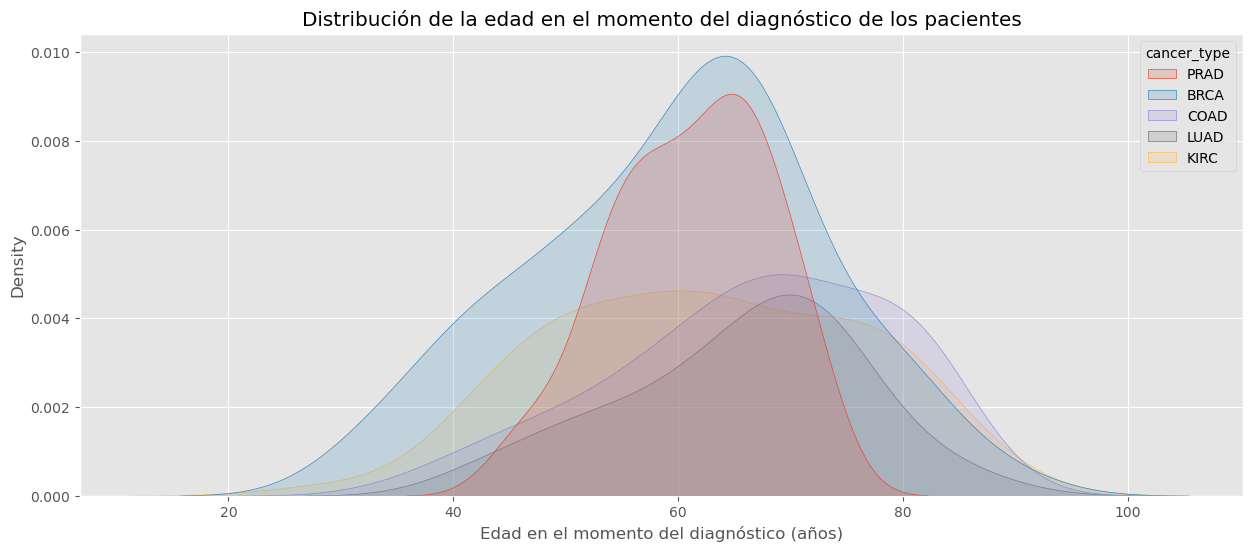

In [7]:
# configuración de los parámetros de la figura

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.kdeplot(data=data, x='age_at_diagnosis_years', hue='cancer_type',
           fill=True, alpha=.2, ax=ax)
plt.title('Distribución de la edad en el momento del diagnóstico de los pacientes')
plt.xlabel('Edad en el momento del diagnóstico (años)')
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/age_distribution.png')
plt.show()

# 3. Pruebas de hipótesis

A continuación veremos algunos ejemplos de cómo realizar 3 tipos de pruebas de hipótesis: Prueba T de una muestra o prueba Z, prueba T de dos muestras y análisis de varianza.

## 3.1 Una muestra
Supongamos que desea responder a la pregunta

> Pregunta1:
>
> ¿Es la media de _edad (en años) en el momento del diagnóstico_ para el cáncer 'KIRC' (de riñón) igual a 55?

### 3.1.1 Prueba T de una muestra
Para abordar esta cuestión, hagamos una prueba t de dos caras sobre la media. Una prueba de dos caras simplemente significa que a la hipótesis alternativa no le importa en qué sentido difiere la media del valor seleccionado.

> H_{0}: media = 55
>
> $H_{1}: media \neq 55$
>
> $\alpha = 0.05$

Calcularemos el valor _t_ de la prueba calculándolo primero mediante la fórmula y utilizando después una función existente del paquete SciPy stats. De esta forma podremos comparar y comprobar nuestras respuestas y luego podremos utilizar una u otra dependiendo de lo que prefiramos.

Hagamos una prueba con las hipótesis anteriores para todas las muestras de tipo de cáncer 'KIRC'.

In [8]:
# obtenemos un subconjunto sólo para los valores KIRC
kirc_data = data.loc[data.cancer_type=='KIRC']

mu_k_age = np.mean(kirc_data['age_at_diagnosis_years']) # edad media de los datos KIRC
sd_k_age = np.std(kirc_data['age_at_diagnosis_years'], ddof=1) # desviación típica de la edad de los datos KIRC, necesita ddof = 1 para la muestra
n_k = len(kirc_data) # número de muestras en los datos KIRC

t = (mu_k_age - 55)/(sd_k_age/np.sqrt(n_k)) # cálculo del valor estadístico t a partir de la fórmula
pval = 2*(1 - stats.t.cdf(np.abs(t), df=n_k-1)) # valor p de dos caras

print('t-statistic: {0:5f} \np-value : {1:5f}'.format(t, pval))

t-statistic: 4.422323 
p-value : 0.000038


In [9]:
# Llamamos a la función de prueba t de 1 muestra de SciPy

stats.ttest_1samp(kirc_data.age_at_diagnosis_years, popmean=55)

TtestResult(statistic=4.422322578447855, pvalue=3.7988529231288875e-05, df=65)

Vemos que obtenemos los mismos valores de ambos métodos tanto para el estadístico __`test = 4,422`__ como para el valor __`p = 0,0004`__. En este punto podríamos sentirnos obligados a mirar el __valor p_ e interpretar el valor de nuestra prueba, pero debemos esperar ya que siempre debemos comprobar los supuestos de nuestra prueba. También queremos comprobar el __error de tipo I__ y el __error de potencia__ o __error de tipo II__ para este tipo de prueba. Por ahora nos ocuparemos del error __Tipo I_ y dejaremos el __Tipo II_ para una sección posterior de este tutorial.

Para que la _Prueba T de una muestra_ sea válida, debe cumplirse cualquiera de los siguientes requisitos: 
1. La distribución de la población es normal. 
    - Podemos hacer una comprobación visual aproximada trazando la distribución o utilizando un gráfico Q-Q.
2. 2. El tamaño de la muestra es suficientemente grande.
    - Por tradición, tendemos a suponer que si el tamaño de la muestra es n > 30, el tamaño de la muestra es lo suficientemente grande_.

Para esta prueba, sabemos que el tamaño de la muestra de la muestra independiente es 66, por lo que ya está satisfecho, pero también vamos a comprobar los gráficos para asegurarnos de que podemos ver la _Distribución Normal_ tanto en el histograma como en el gráfico Q-Q.

/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_79194/2413512411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kirc_data['age_at_diagnosis_years'], kde=True, ax=ax[0])


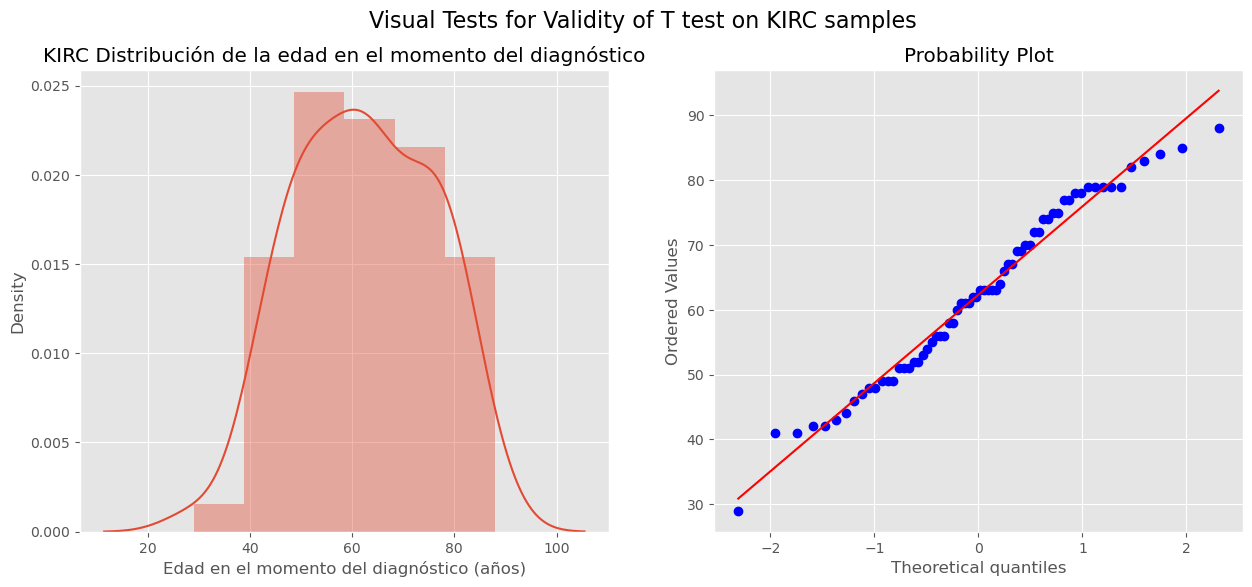

<Figure size 640x480 with 0 Axes>

In [10]:
# configuración de los parámetros de la cifra para el tamaño

fig_dims = (15, 6)
fig, ax = plt.subplots(1,2,figsize=fig_dims)

# Distribución desde seaborn
sns.distplot(kirc_data['age_at_diagnosis_years'], kde=True, ax=ax[0])
ax[0].set_title('KIRC Distribución de la edad en el momento del diagnóstico')
ax[0].set(xlabel="Edad en el momento del diagnóstico (años)")

#QQ-plot plot de las estadísticas
stats.probplot(kirc_data['age_at_diagnosis_years'], dist="norm", plot=ax[1])

fig.suptitle('Visual Tests for Validity of T test on KIRC samples', fontsize=16)
plt.show()
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/kirc_ttest_valid.png')

Vemos que se distribuye con bastante normalidad en el gráfico de histograma/distribución, y que los valores caen en el gráfico Q-Q sobre la línea de normalidad.

Ahora, para probar el error de tipo I, haremos un _Estudio de simulación_ con la media de la distribución aleatoria igual al __$H_{0}: \mu=55$__ y la _desviación típica_ de los datos originales "KIRC".

Lo que intentamos conseguir con el estudio de simulación es averiguar la "probabilidad" de rechazar aleatoriamente por error la hipótesis nula (*Error de Tipo I*), calculando cuántas veces del total de simulaciones caen fuera de nuestro valor crítico. Queremos que nuestra _probabilidad_ esté cerca o por debajo del valor $\alpha$ especificado (normalmente *0,05*).

In [11]:
def one_sample_simulation_values(N,n,mu,mu_0,sd_0,alpha=.95):
    """
        Ejecutamos simulaciones Monte-Carlo para una Distribución Normal de la media y desviación estándar descritas.. 
    
    """
    sims = []
    for i in range(N):
        
        # podemos utilizar numpy o scipy.stats para crear una muestra de tamaño n a partir de una distribución
        samples_0 = np.random.normal(loc=mu_0, scale=sd_0, size=n)
        
        
        critical_value = stats.t.ppf(alpha, n-1)
        t = (np.mean(samples_0) - mu)/(np.std(samples_0,ddof=1)/np.sqrt(n))
        sims.append(np.abs(t) > np.abs(critical_value))
    
    return np.array(sims)

In [12]:
# fijamos un número 'semilla' para poder reproducir la variable aleatoria

np.random.seed(2)

# Comprobamos el valor del error de tipo I de las simulaciones
# utilizamos la media para calcularlo a partir del array devuelto por la función

print("Observed Alpha = {0:5f}".
      format(np.mean(one_sample_simulation_values(N=5000,n=n_k,mu=55,mu_0=55,sd_0=sd_k_age,alpha=.025))))

Observed Alpha = 0.047600


El porcentaje de error de tipo I es cercano a 0,05, lo que concuerda bastante bien con la teoría. Si no hubiéramos obtenido un valor que cumpliera la teoría, tendríamos que utilizar un tipo diferente de prueba estadística para nuestra hipótesis.

Ahora podemos decir mirando la salida de las pruebas de hipótesis, el __`p-valor = 0.0004`__ es << 0.05, la interpretación es que bajo la hipótesis nula _edad media al diagnóstico = 55_ , la probabilidad de ver una estadística de prueba tan extrema o más de lo que se observa es __0.0004__ . Dado que es inferior a nuestro nivel de significación de 0,05, rechazamos la hipótesis nula. edad media al diagnóstico = 55._ 

#### Interpretación unilateral

La prueba anterior nos dice que es improbable que la _edad media en el momento del diagnóstico_ sea igual a 55, pero ¿qué ocurre si queremos comprobar si la media es específicamente *mayor que* 55? Una prueba unilateral tiene una hipótesis alternativa que sólo va en una dirección:

> $H_{0}: media = 55$
>
> $H_{1}: media >55

Como se describe en la sección de antecedentes, t se compara con el valor de la distribución t en un punto determinado (el valor crítico). 

Al hacer una prueba 'mayor que', rechazamos la $H_{0}$ si t > valor crítico. 

Al hacer una prueba "menor que", rechazamos $H_{0}$ si t < valor crítico.

Dado que la distribución t es simétrica alrededor de 0, el valor p de la prueba de "dos caras" que hicimos antes es simplemente 2 veces el valor p de cualquiera de las pruebas de una cara. 

&nbsp;

Para interpretar los resultados anteriores para nuestra prueba de hipótesis unilateral, sólo tenemos que observar:
1. 1. El signo de la estadística de la prueba
2. El valor P dividido por 2

;

Si $H_{1}: media \gt x$

Para rechazar la nula se necesita

- t > 0 
- (p/2) < $\alpha$ 

&nbsp;

Si $H_{1}: media \lt x$

Se necesita lo siguiente para rechazar la nula

- t < 0 
- (p/2) < $\alpha$ 

&nbsp;

Los resultados de la prueba t que hicimos anteriormente tienen una t > 0, y (p/2) < 0,05.

Puesto que queremos usarlo como una prueba unilateral con $H_{1}: media > 55$, estos resultados rechazan $H_{0}$.



### 3.1.2 Prueba Z
Otro estadístico de prueba que puede utilizarse para la prueba de hipótesis de una muestra es **z**. 

Su fórmula es muy similar a la del estadístico t:

$$
z = \frac{overline{x} - m_{0}}{v * \sqrt{n}}
$$

La diferencia es que en lugar de la desviación típica de la muestra, utilizamos la varianza de la población. Este estadístico de prueba alternativo se puede utilizar en situaciones en las que se conoce esta información.

&nbsp;

Veamos de nuevo los datos de ___KIRC___ y probemos lo siguiente utilizando el estadístico z:

> $H_{0}: mean_{age \ at \ diagnosis} = 55$
>
> $H_{1}: media de edad en el momento del diagnóstico = 55$ > $H_{2}: media de edad en el momento del diagnóstico = 55$ > $H_{3}: media de edad en el momento del diagnóstico = 55
>
> $\alpha = 0.05$

El paquete scipy stats no ofrece una función de prueba z simple, así que vamos a utilizar el paquete statsmodels:

In [13]:
# SciPy z test, 'value' se refiere a la media que estamos probando

sm.stats.ztest(kirc_data.age_at_diagnosis_years, value = 55, alternative = 'larger')

(4.422322578447855, 4.8822762370859695e-06)

Dado que z > 0 y p < $\alpha$, rechazamos que la edad media en el momento del diagnóstico sea = 55 años. Es probable que la media de la población sea superior a 55, y rechazamos la hipótesis nula a un nivel de significación del 5%. 

### 3.1.3 Intervalos de confianza

Recuerde que los intervalos de confianza y las pruebas de hipótesis se complementan. Podemos pensar que el intervalo de confianza contiene todos los valores que no habrían sido rechazados por una prueba de hipótesis correspondiente. El intervalo de confianza y la prueba de hipótesis se complementan, en la mayoría de las aplicaciones, es una buena idea informar de los resultados de ambos.

Así que vamos a calcular el _Intervalo de confianza_ para nuestros datos _"KIRC"_ al nivel $\alpha=0.05$.

In [14]:
def confidence_interval(sample, alpha=0.05):
    """
        calculamos el intervalo de confianza para la muestra y el valor alfa proporcionados, alfa es 0,05 por defecto.
    """
    n = len(sample)
    mu = np.mean(sample)
    sd = np.std(sample)
    return mu + stats.t.ppf(np.array([alpha/2, 1 - alpha/2]), df=n-1) * (sd/np.sqrt(n))

In [15]:
# cálculo del intervalo de confianza para datos KIRC
lb, ub = confidence_interval(kirc_data.age_at_diagnosis_years)
print("Tel Límite inferior del C.I. = {0:2f} , el Límite Superior del I.C. = {1:2f}".format(lb, ub))

Tel Límite inferior del C.I. = 59.046757 , el Límite Superior del I.C. = 65.619910


Vemos que el valor de la _hipótesis nula_ para la _edad media en el momento del diagnóstico = 55_ está fuera de los límites del _intervalo de confianza_ , por lo que debemos rechazar la _hipótesis nula_ .   

## 3.2 Prueba T en dos muestras
Hasta ahora sólo hemos hecho preguntas sobre la media de la población subyacente para una muestra. Más a menudo es posible que desee comparar dos muestras.

Digamos que quiere responder a lo siguiente:

> Pregunta 2:
>
> ¿Es diferente la media de _edad (años) de diagnóstico_ entre personas con _Cáncer de colon (COAD)_ frente a personas con _Cáncer de riñón KIRC_ ?

Las hipótesis serían las siguientes

> $H_{0}: media_{COAD} = media_{KIRC}$
>
> $H_{1}: media_{COAD} \neq media_{KIRC}$
> 
> $\alpha = 0.05$

Sin entrar en las fórmulas, que ya vimos en la primera sección de este cuaderno, una prueba sobre dos muestras sigue un proceso similar al de las pruebas sobre una muestra: se calcula un estadístico de prueba y se compara con los valores críticos.

&nbsp;

**NOTA: Las pruebas dependen de la relación entre las muestras**

- ¿Están emparejadas las muestras?
 - (por ejemplo, si las dos muestras representan a los mismos pacientes en dos visitas, entonces cada valor de una muestra está "emparejado" con un valor de la otra muestra).
- ¿Son independientes las muestras?
- ¿Son iguales las varianzas de las muestras?

;

Nuestros datos para responder a la pregunta 2 consisten en las muestras con la etiqueta PRAD y las que tienen la etiqueta LUAD. Estos dos grupos no están emparejados y son independientes. Supondremos que tienen la misma varianza.

Utilicemos la función SciPy para la prueba t de dos muestras independientes, que toma ambas muestras como argumentos. Debemos tener en cuenta que la función por defecto asume igual varianza, lo que significa que esto sería una [_"prueba t de Student"_](https://en.wikipedia.org/wiki/Student%27s_t-test) mientras que si establecemos el `equal_var` a _False_ entonces tenemos una [_"prueba t de Welch"_](https://en.wikipedia.org/wiki/Welch%27s_t-test)(o _"prueba t de varianzas desiguales"_ ).

Utilizaremos la prueba _Welch t_ , tanto la prueba _Student t_ como la prueba _Welch t_ calculan el mismo resultado cuando se puede suponer igual tamaño y varianza para las muestras, pero la prueba _Welch t_ se comporta mejor que la prueba _Student t_ cuando los tamaños de las muestras y las varianzas son desiguales entre las muestras. 

In [16]:
# Seleccionamos muestras con PRAD y COAD, .isna() se usa aquí para asegurarse de eliminar cualquier valor nan

prad = data.loc[(data['cancer_type'] == 'PRAD')&(~data.age_at_diagnosis_years.isna())]
coad = data.loc[(data['cancer_type'] == 'COAD')&(~data.age_at_diagnosis_years.isna())]

# Llamamos a la función de prueba t de dos muestras de scipy, y establece 'equal_var' a False

tstat, pval = stats.ttest_ind(coad.age_at_diagnosis_years, prad.age_at_diagnosis_years, equal_var=False)

mu_c_age = coad.age_at_diagnosis_years.mean()
mu_p_age = prad.age_at_diagnosis_years.mean()

print("COAD edad media al diagnóstico: {0:2f} \t PRAD edad media al diagnóstico: {1:2f}, \n\
test statistic: {2:2f} \t p-value: {3:2f}".format(mu_c_age, mu_p_age, tstat, pval))

COAD edad media al diagnóstico: 66.793103 	 PRAD edad media al diagnóstico: 61.126984, 
test statistic: 3.111771 	 p-value: 0.002494


Los resultados anteriores (p < $\alpha$) rechazan la hipótesis de que las medias son iguales. Es probable que la _edad media en el momento del diagnóstico_ sea diferente en la población de personas con PRAD frente a las que tienen LUAD, de hecho, podemos ver que la $media_{edad \ coad}=66,8$ y la $media_{edad \ prad}=61,1$.

Del mismo modo que hicimos con la prueba T de una muestra, podemos realizar estudios de simulación para comprobar el error de tipo I para nuestras pruebas de dos muestras, sólo tendremos que ajustar la fórmula en nuestra función de valores de simulación de una muestra.

Nota:
No debemos olvidar la utilidad de las funciones en Python y que siempre que sea posible debemos intentar convertir un trozo de código repetitivo o conveniente en una función. Seguiremos esta práctica en los cambios que realizaremos en la función simulaciones.

In [17]:
def two_sample_simulation_values(N,n1,n2,mu1,mu2,sd1,sd2,alpha=.95, z_test=True):
    """
        Realizaremos simulaciones Monte-Carlo para una Distribución Normal de la media y desviación estándar descritas. 
    
    """
    sims = []
    for i in range(N):
        
        # podemos utilizar numpy o scipy.stats para crear una muestra de tamaño n a partir de una distribución
        sample_1 = np.random.normal(loc=mu1, scale=sd1, size=n1)
        sample_2 = np.random.normal(loc=mu2, scale=sd2, size=n2)
        
        if z_test == True:
            test_stat = z_test_statistic_two_sample(sample_1, sample_2)
            critical_value = stats.norm.ppf(1-alpha)
            test = np.abs(test_stat) > np.abs(critical_value)
            
        else:
            # Llamamos a la función de prueba t de dos muestras de scipy, y establecemos 'equal_var' en False
            test_stat, pval = stats.ttest_ind(sample_1, sample_2, equal_var=False)
            test = pval < 1-alpha
        
        sims.append(test)
    
    return np.array(sims)

def z_test_statistic_two_sample(sample1,sample2):
    """
        computes the z statistic for 2 sample test
    """
    # cálculo de medias muestrales
    mu_1 = np.mean(sample1)
    mu_2 = np.mean(sample2)
    
    # cálculo de los errores estándar
    se_1 = np.std(sample1)**2 / len(sample1)
    se_2 = np.std(sample2)**2 / len(sample2)
    
    z = (mu_1-mu_2 - 0)/np.sqrt(se_1+se_2)
    return z


In [18]:
# obtenemos las variables para alimentar las simulaciones
n_p = len(prad)
n_c = len(coad)
sd_p = np.std(prad.age_at_diagnosis_years, ddof=1)
sd_c = np.std(coad.age_at_diagnosis_years, ddof=1)

In [19]:
# fijamos un número 'semilla' para poder reproducir la variable aleatoria

np.random.seed(2)

# Comprobamos el valor del error de tipo I de las simulaciones
# usamos la media para calcular esto desde el array devuelto por la función
# recuerda siempre que queremos que las medias sean iguales entre sí

print("Observed Alpha for Z-test= {0:5f} \nObserved Alpha for Welch-test= {1:5f}".
format(np.mean(two_sample_simulation_values(N=5000,n1=n_p,n2=n_c,mu1=62,mu2=62,sd1=sd_p,sd2=sd_c,alpha=.95)),
      np.mean(two_sample_simulation_values(N=5000,n1=n_p,n2=n_c,mu1=62,mu2=62,sd1=sd_p,sd2=sd_c,alpha=.95,z_test=False))))

Observed Alpha for Z-test= 0.100800 
Observed Alpha for Welch-test= 0.052800


Podemos ver que si realizamos simulaciones tanto para la __prueba Z_ como para la __prueba t de Welch_ , sólo esperamos que la ___prueba t de Welch___ se comporte como se espera a la teoría de rechazar en torno al $\alpha=0,05$.


## 3.3 ANOVA

Digamos que queremos hacer una pregunta sobre los diferentes grupos, como los genes que seleccionamos como _Genes de valor superior_ del _Tutorial I_ , a la vez:

> Pregunta 3:
>
> Digamos que sabemos que los datos de recuento de genes son importantes para determinar la probabilidad de que los genes reaccionen a un fármaco.

> Por lo tanto, nos gustaría saber para nuestros _Genes de mayor valor_ ,  
> ¿Tienen todos los genes la misma media subyacente en sus datos de recuento?

Para comprobarlo, puede utilizarse un análisis de varianza unidireccional (ANOVA). Conceptualmente, el enfoque del ANOVA es comparar la varianza *dentro* de los grupos individuales con la varianza *entre* ellos. 

Se calcula un estadístico de prueba llamado estadístico F y se compara con los valores críticos, como en las pruebas de hipótesis simples. 

&nbsp;

Utilicemos el ANOVA para responder a la pregunta 3. En primer lugar, nuestras hipótesis:

> $H_{0}: \delta_{i} = 0$ para todas las muestras 'i'
>
> $H_{1}: \delta_{i} \neq 0$ para al menos una muestra 'i'
>
> *donde $\delta_{i}$ es la diferencia entre la media del grupo **i** y la media general*
> 
> $\alpha = 0.05$

Para ello, vamos a utilizar la función ANOVA unidireccional de los paquetes SciPy y statsmodels. Para que podamos utilizar ANOVA, debemos comprobar los supuestos para ANOVA:
1. Independencia (de las muestras y de las observaciones dentro de cada muestra)
    - Ya sabemos que las muestras son independientes_.
2. 2. Igualdad de varianzas
    - _Haremos una comprobación visual para ver qué genes cumplen este supuesto_
3. Grandes tamaños de muestra o distribuciones normales
    - _Tenemos tamaños de muestra de más de 300, suficientemente grandes_

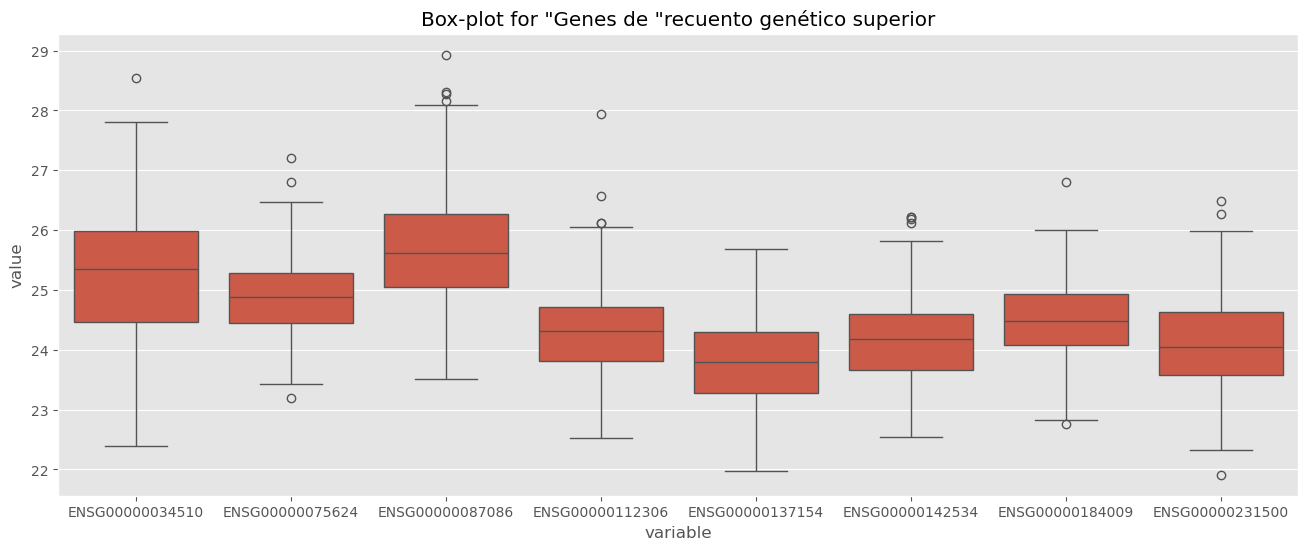

In [20]:
# Seleccionamos algunos genes para incluirlos en la comparación

# En lugar del método habitual de subconjunto de un marco de datos, creamos una lista de cada 
# grupo individual porque la función ANOVA de statsmodels requiere 
# una lista de matrices unidimensionales como entrada, en lugar de un marco de datos bidimensional.

gene_names = ['ENSG00000034510','ENSG00000075624','ENSG00000087086','ENSG00000112306',
              'ENSG00000137154','ENSG00000142534','ENSG00000184009','ENSG00000231500']


# Comprobamos las desviaciones mediante un diagrama de caja
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="variable", y="value", data=pd.melt(data[gene_names]), ax=ax)
plt.title('Box-plot for "Genes de "recuento genético superior')
plt.savefig('../3-Outputs/boxplot_topgenes_anova.png')
plt.show()

Vemos que no todos los genes parecen tener _varianzas iguales_, los únicos que parecen bastante cercanos son __'ENSG00000075624', 'ENSG00000112306', 'ENSG00000137154', 'ENSG00000142534'___ , así que haremos una prueba ANOVA para estos.

In [21]:
cols = ['ENSG00000075624','ENSG00000112306','ENSG00000137154','ENSG00000142534']

# Llamamos a la función ANOVA de statsmodels

stats.f_oneway(data[cols[0]],data[cols[1]],data[cols[2]],data[cols[3]])    

F_onewayResult(statistic=153.15032630032366, pvalue=8.40878552399828e-86)

In [22]:
# Anova con funciones statsmodels y función para mostrar tabla
########

data_anova = pd.melt(data[cols]) # datos en el formato necesario
model = ols('value ~ C(variable)', data=data_anova).fit() # 'r' como fórmula para el modelo anova
aov_table = sm.stats.anova_lm(model, typ=2) # correr anova 

def anova_table(aov):
    """
        La siguiente función se creó específicamente para los resultados de la tabla ANOVA unidireccional devueltos para la suma de cuadrados de tipo II
    """
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(variable),214.806237,3.0,71.602079,153.150326,8.408786e-86,0.247622,0.245873
Residual,652.669208,1396.0,0.467528,NaN,NaN,NaN,NaN


Tanto _SciPy_ como _statsmodels_ dan los mismos valores para el estadístico ___F = 153.15___ y el valor ___p = 8.41e-86___ , pero tenemos la ventaja añadida con statsmodels de realizar funciones "estilo r" y una bonita visualización.
 
Lo importante a tener en cuenta es el valor p, y $p < \alpha$. 

Podemos rechazar la hipótesis de que todos estos 4 genes seleccionados tienen los mismos datos de recuento medio subyacente.

# 4. Potencia y tamaño de la muestra

Al diseñar un experimento, además de controlar la tasa de error de tipo I (normalmente a un nivel de 0,05), también es importante controlar la tasa de error de tipo II, o lo que es lo mismo, la potencia:
> **Potencia = *P* (Rechazar *$H_{0}$* dado que se cumple la alternativa *$H_{1}$*)**.  
También se escribe como  
**Potencia = 1 - *P* (Error de tipo II) = 1 - $\beta$**

Recordemos que para nuestro experimento y las pruebas de hipótesis, primero abordamos el error de _Tipo I_ y, a partir de ahí, abordamos los errores de _Tipo II_ calculando la potencia deseada y cambiando el tamaño de muestra necesario.

Una buena forma de pensar en la potencia es
> Como investigadores, nos gustaría saber cuánta potencia habrá para detectar la hipótesis alternativa $H_{1}$ de interés.

Por lo tanto, para calcular la potencia y probar un tamaño de muestra lo suficientemente grande, tenemos que probar cuán grande es la diferencia en las medias de nuestros datos que estamos dispuestos a incluir en nuestro experimento. Vamos a calcular la potencia en algunas de nuestras pruebas de hipótesis de la sección anterior.

Por tradición, normalmente queremos tener al menos un 80% de potencia en nuestros experimentos a un $\alpha=0,05$. Así que calcularemos la potencia actual y si no tenemos suficiente potencia calcularemos el tamaño de muestra necesario que nos daría la potencia deseada. 


## 4.1 Potencia de una muestra

Dado que estamos interesados en la _edad media en el momento del diagnóstico_ para el cáncer _'KIRC'_:

> Pregunta1:
>
> ¿Es la _edad media (en años) en el momento del diagnóstico_ del cáncer 'KIRC' (riñón) igual a 55?  
También estamos interesados en calcular la __potencia para detectar una diferencia en la *edad media en el momento del diagnóstico de 4 años*__ .

In [23]:
# Funciones para el cálculo de la potencia y el tamaño de una muestra

def one_sample_size_required(power,N,n,mu,mu_0,sd_0,alpha=.95):
    """
        Calcula el tamaño mínimo de la muestra necesario para alcanzar la potencia deseada
    
    """
    sim_power = 0
    power_values = list()
    n_tem = n
    while(sim_power <= power):
    
        simulation_value = [np.mean(one_sample_simulation_values(N,n,mu,mu_0,sd_0,alpha))]
        sim_power = np.mean(simulation_value)
        power_values.append([sim_power])
        if n_tem == n:
            print("Tamaño actual de la muestra: {0:1d} \t Potencia actual: {1:1f}".format(n, sim_power))
    
        n += 1
    print("Tamaño de muestra necesario: {0:1d} \t\t Potencia final: {1:1f}".format(n, sim_power))
    

def one_sample_size_calculation_formula(sd, diff_means, pow_wanted, pow_alpha):
    """
        Calcula el tamaño de muestra necesario para la potencia deseada mediante la fórmula
    """

    return (sd**2 * (stats.norm.ppf(pow_wanted) + stats.norm.ppf(pow_alpha))**2)/diff_means**2




In [24]:
one_sample_size_required(power=.80,N=5000,n=n_k,mu=59,mu_0=55,sd_0=sd_k_age,alpha=.975)

Tamaño actual de la muestra: 66 	 Potencia actual: 0.656800
Tamaño de muestra necesario: 93 		 Potencia final: 0.802800


In [25]:
one_sample_size_calculation_formula(sd=sd_k_age,diff_means=4,pow_wanted=.8,pow_alpha=.975)

89.02944032006867

Así, vemos que la potencia inicial para detectar una _diferencia de 4 años_ en la _edad media en el momento del diagnóstico_ para nuestro experimento es del 66%, que es baja en comparación con el 80% que queremos. A partir de las funciones `one_sample_size_required` y `one_sample_size_calculation_formula`, vemos que necesitaríamos alrededor de un tamaño de muestra de 90 para alcanzar la potencia deseada.


## 4.2 Potencia de dos muestras

Dada nuestra segunda pregunta

> Pregunta 2:
>
> ¿Es diferente la _edad (años) media de diagnóstico_ entre las personas con _Cáncer de colon (COAD)_ y las personas con _Cáncer de riñón KIRC_?

Queremos calcular de nuevo la __potencia para detectar una diferencia en la *edad media al diagnóstico de 6 años*__ .

In [26]:
def two_sample_size_required(power,N,n1,n2,mu1,mu2,sd1,sd2,alpha=.975):
    """
        Calcula el tamaño mínimo de la muestra necesario para alcanzar la potencia deseada
    
    """
    sim_power = 0
    power_values = list()
    n = min(n1,n2)
    n_tem = n
    while(sim_power <= power):
    
        simulation_value = [np.mean(two_sample_simulation_values(N,n1,n2,mu1,mu2,sd1,sd2,alpha,z_test=False))]
        sim_power = np.mean(simulation_value)
        power_values.append([sim_power])
        if n_tem == n:
            print("Tamaño actual de la muestra: {0:1d} \t Potencia actual: {1:1f}".format(n, sim_power))
    
        n += 1
        print("Tamaño de muestra necesario: {0:1d} \t\t Potencia final: {1:1f}".format(n, sim_power))
    

def two_sample_size_calculation_formula(sd1, sd2, diff_means, pow_wanted, pow_alpha):
    """
        Calcula el tamaño de la muestra necesario para la potencia deseada mediante la fórmula para dos grupos de muestras
    """
    
    return((sd1**2 + sd2**2)*(stats.norm.ppf(pow_wanted) + stats.norm.ppf(pow_alpha))**2)/diff_means**2

In [27]:
two_sample_size_calculation_formula(sd1=sd_k_age,sd2=sd_c,diff_means=6,pow_wanted=.8,pow_alpha=.975)

71.60491087351662

Vemos de nuevo que el tamaño inicial de nuestra muestra es pequeño para la potencia deseada del 80% para detectar una _diferencia en 6 años en las medias a la edad de diagnóstico_ . A partir de nuestras funciones, vemos que necesitamos una muestra de aproximadamente 72 para alcanzar la potencia deseada.


# Conclusión

En este tutorial se introdujeron conceptos de pruebas de hipótesis, diferentes estadísticas de prueba, simulaciones estadísticas y cálculos de potencia. Hemos trabajado a través de ejemplos de cómo utilizar las funciones en el __SciPy__ y __statsmodels__ bibliotecas de Python para realizar diferentes pruebas de hipótesis pertinentes a los datos genómicos pancan. Ahora debe tener los fundamentos para diseñar y evaluar adecuadamente la prueba de hipótesis y construir a partir de ahí en su investigación mediante la aplicación de las enseñanzas de este tutorial.

Ahora podemos pasar al siguiente tutorial de la serie PANCAN Genomic o volver a los anteriores:

- Tutorial 1 - Principiante]
- Tutorial 2 - Intermedio] (*actual*) 
- Tutorial 3 - Avanzado]